# Table of Contents
* [The HiC_data object](#The-HiC_data-object)
* [Filter columns with too few interaction count](#Filter-columns-with-too-few-interaction-count)
* [Normalization](#Normalization)
	* [Other normalizations](#Other-normalizations)
* [Save raw and normalized matrices](#Save-raw-and-normalized-matrices)
	* [Save biases and bin filtering](#Save-biases-and-bin-filtering)
	* [Save normalized chromosome matrices](#Save-normalized-chromosome-matrices)


# The HiC_data object

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [2]:
r_enz_1 = 'HindIII'
r_enz_2 = 'MboI'
reso = 100000

In [ ]:
hic_data_1 = load_hic_data_from_reads(
    'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_1),
    reso)
hic_data_2 = load_hic_data_from_reads(
    'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_2),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


     2     4     5  1203  1208  1218  1220  1222  1224  1225  1226  1227  1228  1229  1230  1231  1232  1233  1234  1235
  1236  1237  1238  1239  1240  1241  1242  1243  1244  1245  1246  1247  1248  1253  1254  1255  1256  1257  1258  1259
  1260  1261  1262  1263  1264  1265  1266  1267  1268  1269  1270  1271  1272  1273  1274  1275  1276  1277  1278  1279
  1280  1281  1282  1283  1284  1285  1286  1287  1288  1289  1290  1291  1292  1293  1294  1295  1296  1297  1298  1299
  1300  1301  1302  1303  1304  1305  1306  1307  1308  1309  1310  1311  1312  1313  1314  1315  1316  1317  1318  1319
  1320  1321  1322  1323  1324  1325  1326  1327  1328  1329  1330  1331  1332  1333  1334  1335  1336  1337  1338  1339
  1340  1341  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  1358  1359
  1360  1361  1362  1363  1364  1365  1366  1367  1368  1369  1370  1371  1372  1373  1374  1375  1376  1377  1378  1379
  1380  1381  1382  1383  1384 

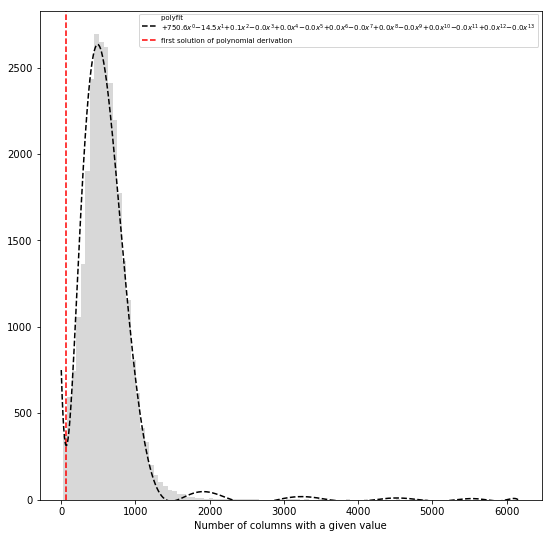


     1     2     3     4     5     6     7     8    10    13    14    28   130  1203  1207  1208  1213  1214  1217  1218
  1219  1220  1221  1222  1223  1224  1225  1226  1227  1228  1229  1230  1231  1232  1233  1234  1235  1236  1237  1238
  1239  1240  1241  1242  1243  1244  1245  1246  1247  1248  1249  1253  1254  1255  1256  1257  1258  1259  1260  1261
  1262  1263  1264  1265  1266  1267  1268  1269  1270  1271  1272  1273  1274  1275  1276  1277  1278  1279  1280  1281
  1282  1283  1284  1285  1286  1287  1288  1289  1290  1291  1292  1293  1294  1295  1296  1297  1298  1299  1300  1301
  1302  1303  1304  1305  1306  1307  1308  1309  1310  1311  1312  1313  1314  1315  1316  1317  1318  1319  1320  1321
  1322  1323  1324  1325  1326  1327  1328  1329  1330  1331  1332  1333  1334  1335  1336  1337  1338  1339  1340  1341
  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  1358  1359  1360  1361
  1362  1363  1364  1365  1366 

Found 2821 of 30894 columns with poor signal



     4     5     6  1217  1219  1220  1221  1222  1223  1224  1225  1226  1227  1228  1229  1230  1231  1232  1233  1234
  1235  1236  1237  1238  1239  1240  1242  1243  1244  1245  1246  1247  1248  1253  1254  1255  1256  1257  1258  1259
  1260  1261  1262  1263  1264  1265  1266  1267  1268  1269  1270  1271  1272  1273  1274  1275  1276  1277  1278  1279
  1280  1281  1282  1283  1284  1285  1286  1287  1288  1289  1290  1291  1292  1293  1294  1295  1296  1297  1298  1299
  1300  1301  1302  1303  1304  1305  1306  1307  1308  1309  1310  1311  1312  1313  1314  1315  1316  1317  1318  1319
  1320  1321  1322  1323  1324  1325  1326  1327  1328  1329  1330  1331  1332  1333  1334  1335  1336  1337  1338  1339
  1340  1341  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  1358  1359
  1360  1361  1362  1363  1364  1365  1366  1367  1368  1369  1370  1371  1372  1373  1374  1375  1376  1377  1378  1379
  1380  1381  1382  1383  1384 

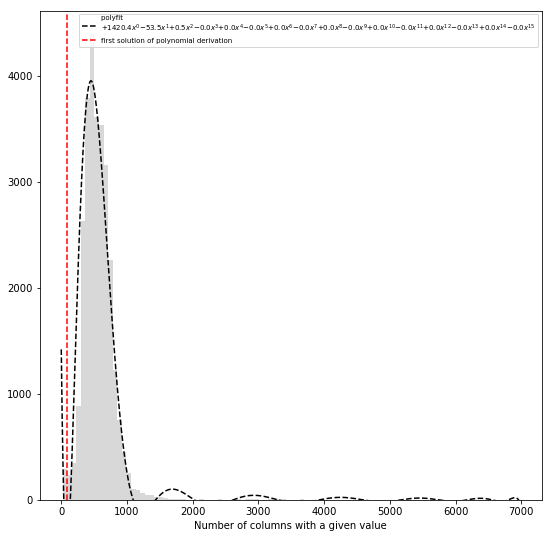

Found 2770 of 30894 columns with poor signal



     1     2     3     4     5     6     7     8   130   131  1037  1203  1204  1207  1208  1209  1214  1217  1218  1219
  1220  1221  1222  1223  1224  1225  1226  1227  1228  1229  1230  1231  1232  1233  1234  1235  1236  1237  1238  1239
  1240  1241  1242  1243  1244  1245  1246  1247  1248  1249  1253  1254  1255  1256  1257  1258  1259  1260  1261  1262
  1263  1264  1265  1266  1267  1268  1269  1270  1271  1272  1273  1274  1275  1276  1277  1278  1279  1280  1281  1282
  1283  1284  1285  1286  1287  1288  1289  1290  1291  1292  1293  1294  1295  1296  1297  1298  1299  1300  1301  1302
  1303  1304  1305  1306  1307  1308  1309  1310  1311  1312  1313  1314  1315  1316  1317  1318  1319  1320  1321  1322
  1323  1324  1325  1326  1327  1328  1329  1330  1331  1332  1333  1334  1335  1336  1337  1338  1339  1340  1341  1342
  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  1358  1359  1360  1361  1362
  1363  1364  1365  1366  1367 

In [ ]:
hic_data_1.filter_columns(draw_hist=True, min_count=10, by_mean=True)
hic_data_2.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [ ]:
print len(hic_data_1)
print len(hic_data_1.bads)
print len(hic_data_2)
print len(hic_data_2.bads)

30894
2821
30894
2770


# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [ ]:
hic_data_1.normalize_hic(iterations=10, max_dev=0.1)
hic_data_2.normalize_hic(iterations=10, max_dev=0.1)

iterative correction
  - copying matrix
  - computing baises
            53.000         613.463        6165.000    0   9.04951
           221.503         702.913        3442.673    1   3.89772
           211.861         756.293        1206.258    2   0.71987
           550.264         788.094        2006.269    3   1.54572
           367.352         809.563        1036.279    4   0.54623
           665.529         823.372        1547.171    5   0.87907
           491.421         832.871         980.362    6   0.40997
           728.856         839.204        1283.788    7   0.52977
           592.486         843.610         946.285    8   0.29768
           765.675         846.615        1126.662    9   0.33078
           670.182         848.725         921.856   10   0.21037
rescaling to factor 1
  - getting the sum of the matrix
    => 28121.366
  - rescaling biases
iterative correction
  - copying matrix
  - computing baises
            78.000         568.211       10308.000    0  1

At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

In [ ]:
from pytadbit.mapping.analyze import hic_map

### Raw data

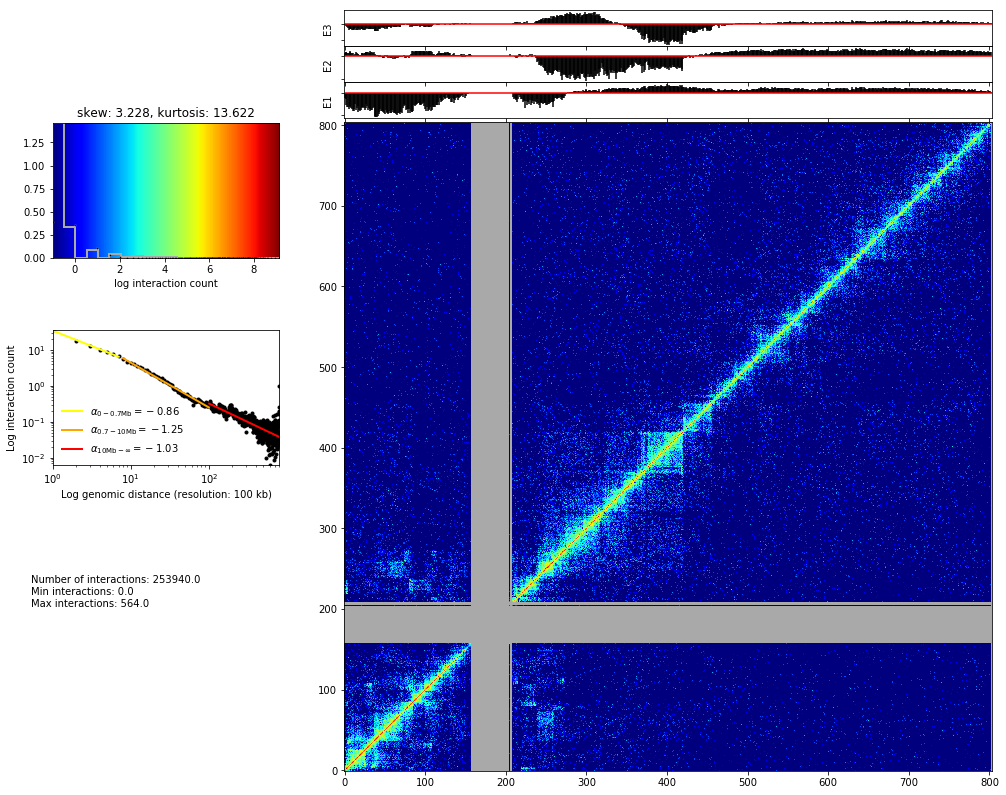

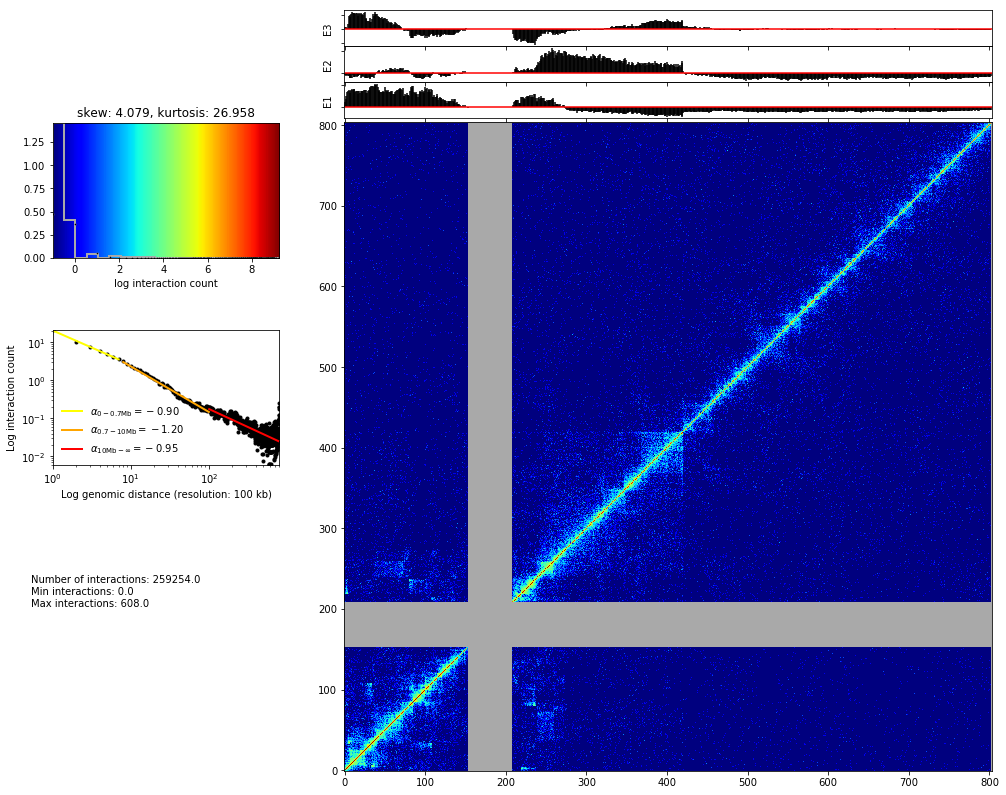

In [21]:
hic_map(hic_data_1, normalized=False, focus='chr18', show=True)
hic_map(hic_data_2, normalized=False, focus='chr18', show=True)

### Normalized with ICE

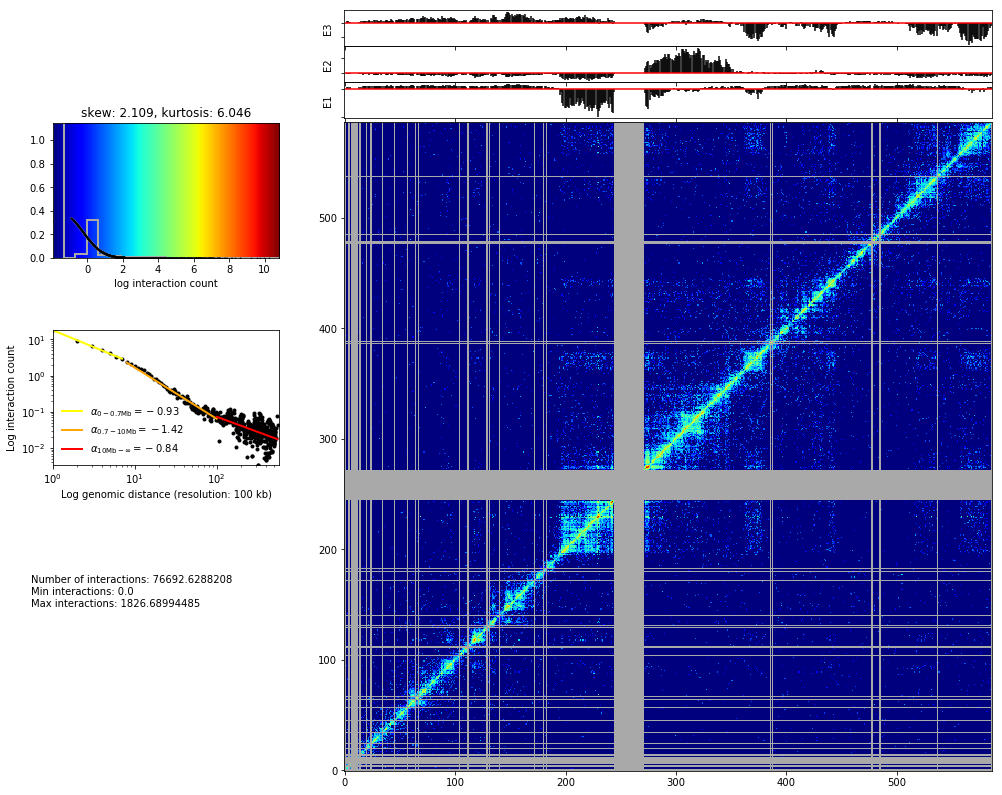

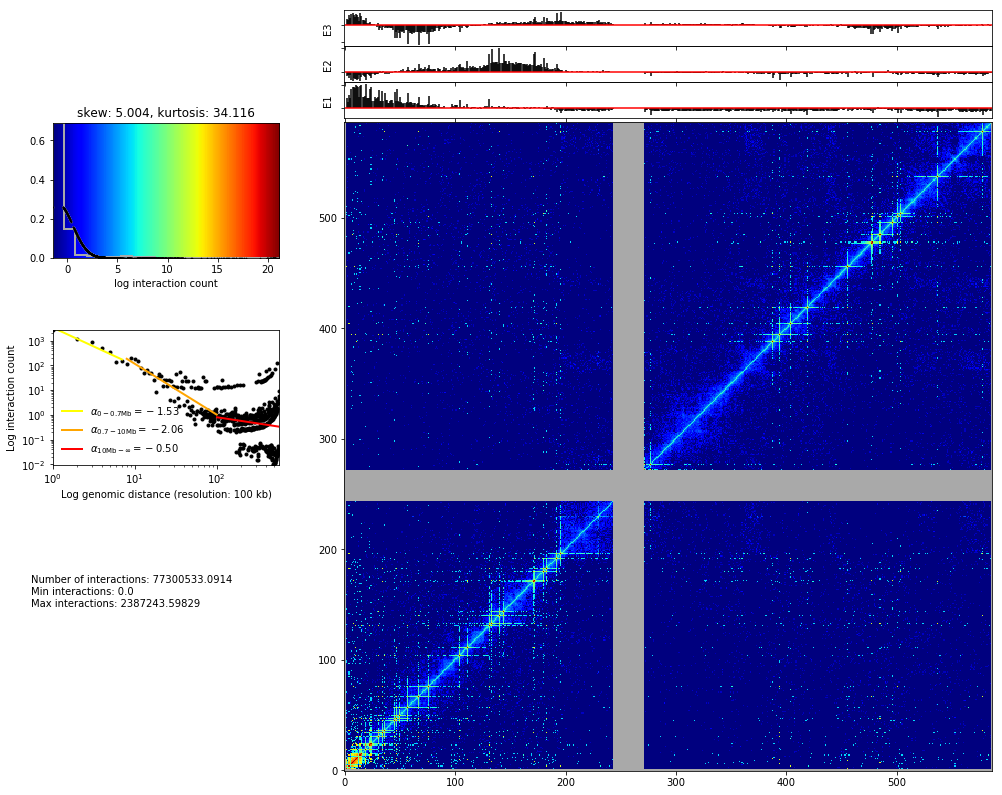

In [47]:
hic_map(hic_data_1, normalized=True, focus='chr19', show=True)
hic_map(hic_data_2, normalized=True, focus='chr19', show=True)

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [ ]:
from cPickle import dump

In [ ]:
! mkdir -p results/$r_enz_1/04_normalizing
! mkdir -p results/$r_enz_2/04_normalizing

Save biases to separate file.

In [ ]:
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bias, out)
out.close()
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bias, out)
out.close()

Save "bad" columns to an other file

In [ ]:
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bads, out)
out.close()
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bads, out)
out.close()

## Dryhic normalization

We can launch the external script to use dryhic normalization

In [56]:
! time ./dryhic3.r results/HindIII/03_filtering/valid_reads12_HindIII.tsv \
       results/HindIII/04_normalizing/bad_columns_100000_HindIII.pick \
       HindIII hg38 100000 results/HindIII/04_normalizing/biases_dryhic_100000_HindIII.pick

Getting contacts
Read 8626149 rows and 2 (of 13) columns from 0.969 GB file in 00:00:06
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results
38.34user 1.20system 0:39.60elapsed 99%CPU (0avgtext+0avgdata 1242688maxresident)k
0inputs+4520outputs (0major+604512minor)pagefaults 0swaps


In [57]:
! time ./dryhic3.r results/MboI/03_filtering/valid_reads12_MboI.tsv \
       results/MboI/04_normalizing/bad_columns_100000_MboI.pick \
       MboI hg38 100000 results/MboI/04_normalizing/biases_dryhic_100000_MboI.pick

Getting contacts
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results
30.23user 0.68system 0:30.96elapsed 99%CPU (0avgtext+0avgdata 559636maxresident)k
0inputs+4496outputs (0major+300349minor)pagefaults 0swaps


### load biases from dryhic

In [64]:
bias_dry_path = 'results/{1}/04_normalizing/biases_dryhic_{0}_{1}.tsv'

hic_data_1.bias = dict([(int(l.split()[0]), float(l.split()[1])) 
                        for l in open(bias_dry_path.format(reso, 'HindIII'))])
hic_data_2.bias = dict([(int(l.split()[0]), float(l.split()[1])) 
                        for l in open(bias_dry_path.format(reso, 'MboI'))])

In [74]:
! head results/HindIII/04_normalizing/biases_dryhic_1000000_HindIII.tsv

0	0.00105622295708459
1	0.452373658414135
2	0.469817499794308
3	0.552570200065611
4	0.894303250585135
5	0.954625774079088
6	0.705497046309491
7	0.821111026308763
8	0.977046209073456
9	0.699782535635113


In [76]:
pwd

u'/home/student/Course/3DAROC/Notebooks'

In [75]:
! head -n 26551 results/HindIII/04_normalizing/biases_dryhic_100000_HindIII.tsv | tail -n 200

26351	0.920341190522334
26352	0.874437150791009
26353	0.870697530468599
26354	0.860437978480696
26355	0.926971042670207
26356	1.06966736071618
26357	0.962651707698818
26358	1.01517845763069
26359	1.0077779155845
26360	1.04862345800636
26361	1.09284808783634
26362	1.07596566198664
26363	0.472683948524558
26364	0.14292872877989
26365	0.154481394712933
26366	0.174317587045516
26367	0.184436873474826
26368	0.17343431925146
26369	0.177095896519956
26370	0.164647731110806
26371	0.192703705454878
26372	0.165863762418259
26373	0.141057953422581
26374	0.17154993731329
26375	0.168587791386312
26376	0.165856646960853
26377	0.174058945122449
26378	0.170533479145323
26379	0.17557612265559
26380	0.165838693467288
26381	0.172846705747907
26382	0.146785416065938
26383	0.412032142764145
26384	0.978909497908736
26385	1.12320167615555
26386	1.18057691431354
26387	1.11650516971643
26388	1.12458635309916
26389	0.940851691194111
26390	0.977579582796321
26391	0.945619771761426
26392	0.962004840261797
26393	0

In [71]:
b, e

(25747, 26551)

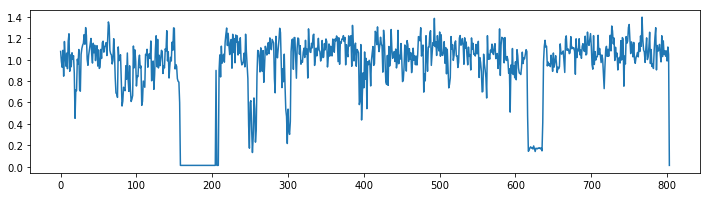

In [70]:
b, e = hic_data_1.section_pos['chr18']
plt.figure(figsize=(12,3))
plt.plot([hic_data_1.bias[i] for i in range(b, e)])

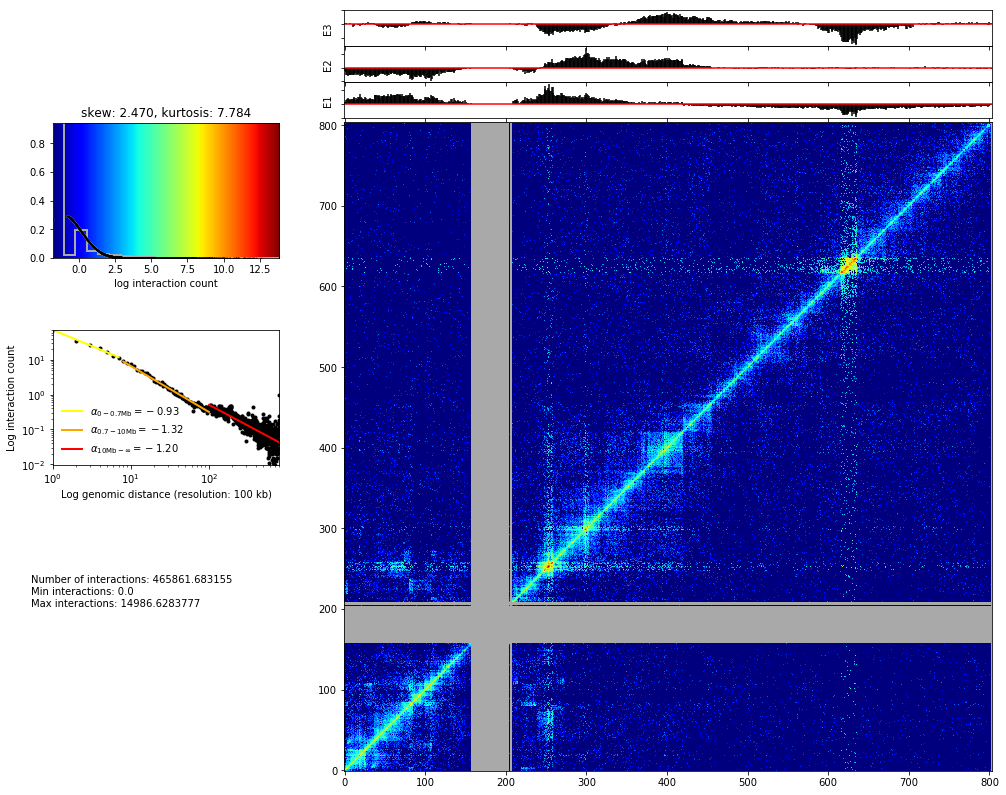

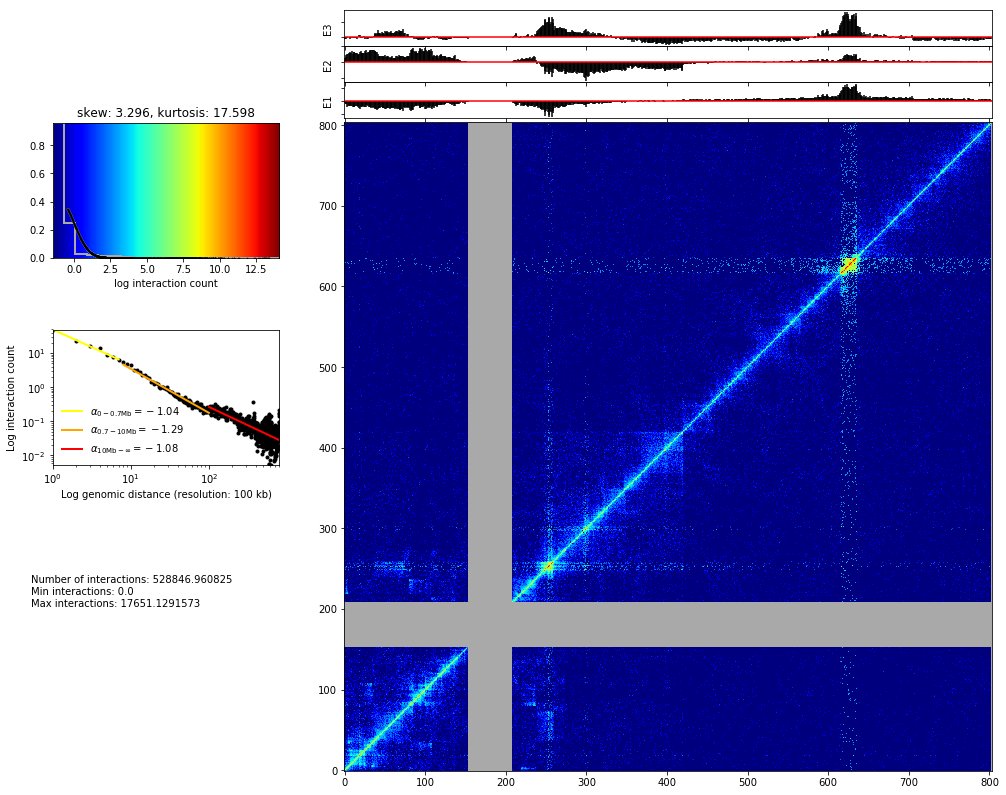

In [65]:
hic_map(hic_data_1, normalized=True, focus='chr18', show=True)
hic_map(hic_data_2, normalized=True, focus='chr18', show=True)

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [ ]:
hic_map(hic_data_1, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_2))

In [ ]:
hic_map(hic_data_1, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_2))

If the resolution is not to low, we could also save genomic matrices:

In [ ]:
if reso >= 300000:
    hic_map(hic_data_1, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_1))

    hic_map(hic_data_1, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_1))
    hic_map(hic_data_2, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_2))

    hic_map(hic_data_2, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_2))    

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

